In [61]:
# !pip3 install openpyxl
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Part 3 Data Discovery

In [105]:
orders = pd.read_csv('orders.csv')
order_stages = pd.read_csv('order_stages.csv')
print(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65584 entries, 0 to 65583
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   task_id                          65584 non-null  int64  
 1   order_id                         65584 non-null  int64  
 2   customer_id                      65584 non-null  int64  
 3   restaurant_id                    65584 non-null  int64  
 4   city                             65584 non-null  object 
 5   restaurant_address_lng           65584 non-null  float64
 6   restaurant_address_lat           65584 non-null  float64
 7   delivery_address_lng             65584 non-null  float64
 8   delivery_address_lat             65584 non-null  float64
 9   order_state                      65584 non-null  object 
 10  order_promised_delivery          65584 non-null  object 
 11  restaurant_finished_preparation  65525 non-null  object 
dtypes: float64(4), int

,task_id,order_id,customer_id,restaurant_id,city,restaurant_address_lng,restaurant_address_lat,delivery_address_lng,delivery_address_lat,order_state,order_promised_delivery,restaurant_finished_preparation
0,1,1,15116,721,Bucharest,26.074823,44.415090,26.014888,44.428852,delivered,2021-10-15T03:31:11.000Z,2021-10-15T03:08:44.000Z
1,1,2,12572,1445,Bucharest,26.054794,44.454021,26.093656,44.434069,delivered,2021-10-15T03:46:07.000Z,2021-10-15T03:24:22.000Z
2,1,3,34814,891,Bucharest,26.049776,44.424410,26.020117,44.411906,delivered,2021-10-15T04:00:30.000Z,2021-10-15T03:45:39.000Z
3,1,4,17168,368,Bucharest,26.143047,44.430457,26.126890,44.417530,delivered,2021-10-15T04:15:53.000Z,2021-10-15T04:08:40.000Z
4,1,5,35129,721,Bucharest,26.074823,44.415090,26.030227,44.433221,delivered,2021-10-15T04:44:42.000Z,2021-10-15T04:28:17.000Z


In [173]:
order_restaurant_map = orders[['order_id', 'restaurant_id']]

In [107]:
# print(order_stages.info())
order_stages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384937 entries, 0 to 384936
Data columns (total 15 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   log_id                                          384937 non-null  int64  
 1   city                                            384937 non-null  object 
 2   order_id                                        384937 non-null  int64  
 3   courier_id                                      384937 non-null  int64  
 4   vehicle_type                                    384937 non-null  object 
 5   order_stage                                     384937 non-null  object 
 6   order_stage_start                               384937 non-null  object 
 7   courier_location_lng_at_start                   384860 non-null  float64
 8   courier_location_lat_at_start                   384860 non-null  float64
 9   estimated_travel_time_in_s

,log_id,city,order_id,courier_id,vehicle_type,order_stage,order_stage_start,courier_location_lng_at_start,courier_location_lat_at_start,estimated_travel_time_in_seconds_to_restaurant,estimated_travel_time_in_seconds_to_eater,distance_courier_to_restaurant_address,distance_courier_to_customer_address,updated_expected_delivery_time,task_id
0,1,Bucharest,1,677,motorbike,order_proposed_to_courier,2021-10-15 03:04:02.000,26.082872,44.416126,NaN,NaN,649.953324,NaN,2021-10-15 03:27:30.000,1
1,2,Bucharest,1,677,motorbike,courier_accepts_order,2021-10-15 03:04:12.000,26.082872,44.416126,218.0,NaN,649.953324,NaN,2021-10-15 03:27:10.000,1
2,3,Bucharest,1,677,motorbike,courier_arrived_at_restaurant,2021-10-15 03:08:51.000,26.074600,44.414964,NaN,NaN,22.596096,NaN,2021-10-15 03:26:36.000,1
3,4,Bucharest,1,677,motorbike,courier_picked_up_order,2021-10-15 03:08:54.000,26.074581,44.414966,NaN,756.0,23.668382,4988.52796,2021-10-15 03:24:39.000,1
4,5,Bucharest,2,1970,motorbike,order_proposed_to_courier,2021-10-15 03:24:02.000,26.040890,44.479828,NaN,NaN,3076.131080,NaN,2021-10-15 03:46:36.000,1


In [140]:
# Different Order Stages 
order_stages['order_stage'].unique()
stage_mapping = {
    'order_proposed_to_courier': 'order_proposed_to_courier',
    'courier_accepts_order': 'start_order_proposed_to_courier_end_courier_accepts_order',
    'courier_arrived_at_restaurant': 'start_courier_accepts_order_end_courier_arrived_at_restaurant',
    'courier_picked_up_order': 'start_courier_arrived_at_restaurant_end_courier_picked_up_order',
    'courier_arrived_at_customer': 'start_courier_picked_up_order_end_courier_arrived_at_customer',
    'courier_delivered_order': 'start_courier_arrived_at_customer_end_courier_delivered_order'
}

order_stages_sequence = [
    'order_proposed_to_courier',
    'courier_accepts_order',
    'courier_arrived_at_restaurant',
    'courier_picked_up_order',
    'courier_arrived_at_customer',
    'courier_delivered_order'
]

# Add a sequence number to each stage based on the defined sequence
order_stages['stage_sequence'] = order_stages['order_stage'].apply(lambda x: order_stages_sequence.index(x) if x in order_stages_sequence else -1)

# Map the stage descriptions to the DataFrame
order_stages['stage_description'] = order_stages['order_stage'].map(stage_mapping)


In [136]:
# Time Delta between different stages 
order_stages['order_stage_start'] = pd.to_datetime(order_stages['order_stage_start'])
order_stages = order_stages.sort_values(by=['order_id', 'order_stage_start'])
order_stages['time_diff in sec'] = order_stages.groupby('order_id')['order_stage_start'].diff().dt.total_seconds() 

def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

order_stages['distance in km'] = order_stages.groupby('order_id').apply(
    lambda group: haversine(
        group['courier_location_lng_at_start'].shift(),
        group['courier_location_lat_at_start'].shift(),
        group['courier_location_lng_at_start'],
        group['courier_location_lat_at_start']
    )
).reset_index(level=0, drop=True)

order_stages['speed in kmph'] = 60*60*order_stages['distance in km']/order_stages['time_diff in sec']
order_stages.head()

,log_id,city,order_id,courier_id,vehicle_type,order_stage,order_stage_start,courier_location_lng_at_start,courier_location_lat_at_start,estimated_travel_time_in_seconds_to_restaurant,...,distance_courier_to_restaurant_address,distance_courier_to_customer_address,updated_expected_delivery_time,task_id,time_diff,distance,speed,time_diff in sec,distance in km,speed in kmph
0,1,Bucharest,1,677,motorbike,order_proposed_to_courier,2021-10-15 03:04:02,26.082872,44.416126,NaN,...,649.953324,NaN,2021-10-15 03:27:30.000,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Bucharest,1,677,motorbike,courier_accepts_order,2021-10-15 03:04:12,26.082872,44.416126,218.0,...,649.953324,NaN,2021-10-15 03:27:10.000,1,10.0,0.000000,0.000000,10.0,0.000000,0.000000
2,3,Bucharest,1,677,motorbike,courier_arrived_at_restaurant,2021-10-15 03:08:51,26.074600,44.414964,NaN,...,22.596096,NaN,2021-10-15 03:26:36.000,1,279.0,0.669585,0.002400,279.0,0.669585,8.639811
3,4,Bucharest,1,677,motorbike,courier_picked_up_order,2021-10-15 03:08:54,26.074581,44.414966,NaN,...,23.668382,4988.527960,2021-10-15 03:24:39.000,1,3.0,0.001525,0.000508,3.0,0.001525,1.830458
10,11,Bucharest,1,677,motorbike,courier_arrived_at_customer,2021-10-15 03:38:01,26.015199,44.428529,NaN,...,NaN,43.611625,2021-10-15 03:38:01.000,1,1747.0,4.951174,0.002834,1747.0,4.951174,10.202762


In [ ]:
order_stages= order_stages.merge(order_restaurant_map, how=left', on = 'order_id')

In [142]:
mean_stage_time_summary = order_stages.groupby(['stage_description', 'stage_sequence'])[['time_diff', 'distance']].mean().reset_index()
# Identify the largest inefficiencies
largest_inefficiencies = mean_stage_time_summary.sort_values(by='stage_sequence')
largest_inefficiencies['speed in kmph'] = 60*60*largest_inefficiencies['distance']/largest_inefficiencies['time_diff']
largest_inefficiencies

,stage_description,stage_sequence,time_diff,distance,speed in kmph
0,order_proposed_to_courier,0,0.000000,0.000000,NaN
5,start_order_proposed_to_courier_end_courier_ac...,1,11.405472,0.084150,26.560791
1,start_courier_accepts_order_end_courier_arrive...,2,269.089576,0.422035,5.646176
3,start_courier_arrived_at_restaurant_end_courie...,3,283.416194,0.057815,0.734379
4,start_courier_picked_up_order_end_courier_arri...,4,690.597302,2.422518,12.628292
2,start_courier_arrived_at_customer_end_courier_...,5,131.715021,0.043152,1.179422


In [204]:
largest_inefficiencies.to_clipboard()

In [163]:

# One thing missing is to compute the restaurant prep time. For that using the orders table which we have not used so far
# ASsuming restaurant starts preparing from the time order is proposed to courier. 

filter_order_stages = order_stages[order_stages['stage_sequence'] == 0][['order_id', 'order_stage_start']].copy(deep=True)
restaurant_time = orders.merge(filter_order_stages, on = 'order_id', how = 'left')
restaurant_time['restaurant_finished_preparation'] = pd.to_datetime(restaurant_time['restaurant_finished_preparation'])

# Convert to tz-naive (UTC timezone)
restaurant_time['order_stage_start'] = restaurant_time['order_stage_start'].dt.tz_localize(None)
restaurant_time['restaurant_finished_preparation'] = restaurant_time['restaurant_finished_preparation'].dt.tz_localize(None)
restaurant_time['meal_prep_time'] = (restaurant_time['restaurant_finished_preparation'] - restaurant_time['order_stage_start']).dt.total_seconds()
print(restaurant_time['meal_prep_time'].mean())
restaurant_time.head()

325.58466956508187


,task_id,order_id,customer_id,restaurant_id,city,restaurant_address_lng,restaurant_address_lat,delivery_address_lng,delivery_address_lat,order_state,order_promised_delivery,restaurant_finished_preparation,order_stage_start,meal_prep_time
0,1,1,15116,721,Bucharest,26.074823,44.415090,26.014888,44.428852,delivered,2021-10-15T03:31:11.000Z,2021-10-15 03:08:44,2021-10-15 03:04:02,282.0
1,1,2,12572,1445,Bucharest,26.054794,44.454021,26.093656,44.434069,delivered,2021-10-15T03:46:07.000Z,2021-10-15 03:24:22,2021-10-15 03:24:02,20.0
2,1,3,34814,891,Bucharest,26.049776,44.424410,26.020117,44.411906,delivered,2021-10-15T04:00:30.000Z,2021-10-15 03:45:39,2021-10-15 03:33:42,717.0
3,1,4,17168,368,Bucharest,26.143047,44.430457,26.126890,44.417530,delivered,2021-10-15T04:15:53.000Z,2021-10-15 04:08:40,2021-10-15 03:55:32,788.0
4,1,5,35129,721,Bucharest,26.074823,44.415090,26.030227,44.433221,delivered,2021-10-15T04:44:42.000Z,2021-10-15 04:28:17,2021-10-15 04:14:42,815.0


-45.110546418271106


<AxesSubplot:>

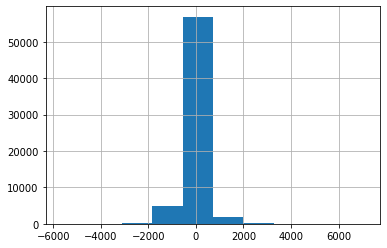

In [211]:

filter_order_stages_2 = order_stages[order_stages['stage_sequence'] == 2][['order_id', 'order_stage_start']].copy(deep=True)
restaurant_time = orders.merge(filter_order_stages_2, on = 'order_id', how = 'left')
restaurant_time['restaurant_finished_preparation'] = pd.to_datetime(restaurant_time['restaurant_finished_preparation'])

# Convert to tz-naive (UTC timezone)
restaurant_time['order_stage_start'] = restaurant_time['order_stage_start'].dt.tz_localize(None)
restaurant_time['restaurant_finished_preparation'] = restaurant_time['restaurant_finished_preparation'].dt.tz_localize(None)
restaurant_time['courier_arrive_minus_rest_finish_prep'] = (restaurant_time['order_stage_start'] - restaurant_time['restaurant_finished_preparation']).dt.total_seconds()
print(restaurant_time['courier_arrive_minus_rest_finish_prep'].mean())



In [157]:
# In above we can say that the mean time for the different paths are as follows:
"""
Time from order proposed to courier to order accepted by courier: 11.41 seconds
Time from courier accepting the order to arriving at the restaurant: 269.09 seconds
Time from courier arriving at the restaurant to picking up the order: 283.42 seconds
Time from courier picking up the order to arriving at the customer: 690.60 seconds
Time from courier arriving at the customer to delivering the order: 131.72 seconds
"""



# Recommendation 2 
""" 
Stage 2 is where Courier travels to Restaurant. Speed Noted here is of 5 kmph.
Stage 4 is where COuntirer travels to customer. Speed Noted here is 12 kmph. 

This is a significant difference assuming the area or operation region is having same traffic condition
in both trips. 

Few things we can try is incentiwise couriers for quicker pickup. As they might have behavioral conditioning 
of travelling faster once they picked up the orders. Since t is inversely prop to v . 
The mean time can be halved here in Stage 2 from 263 to 130 sec and depending on distance
"""

# Observation : Stage 2 to 4 takes the longest time. 
# Mean time to actually deliver the order after arriving at the location is 131 sec about 2 mins. 
# which is reasonable.
"""
Here as well we can send the notification to user to say that driver has arrived.
In case it takes to longer for the driver to deliver, Such locations should be identified. Especially the high order regions 
where the time to delivery post arrival is taking longer so that we can instruct drivers on operation and logsitic issues or see if there 
are any parking info we can provide in app. 
users can be provided option to collect with guard. 
"""

# stage 3 which is waiting time. On an Average restaurant takes 300 sec or 5 mins to prepare the food. 
"""Given that stage 1 , 2 combined take about 280 sec imply that food is almost ready 
Since 300 ~ 280. Therefore the waiting time in Stage 3 of 283 sec should be checked based on Ground Intel
It could be due to various reasons.
 Probable Issue                   Solution                                              
-----------------------------------------------------------------------------------------
 Courier-Related Issues                                                            
 Delayed Arrival             - Optimize routing and scheduling- Improve parking support
 Courier Efficiency          - Provide additional training- Streamline pickup process
 Restaurant Factors                                                                
 Internal Delays             - Improve packaging processes- Increase staffing during peak times, Streamlining multiple orders efficiently.

 Few Data Issues: 
 order_id = 65579
 Restaurant mentioned restaurant_finished_preparation = 2021-11-19 02:11:43
 much before order was proposed to courier 2021-11-19 02:54:56. This resulted in negative meal prep time. 
 Need to further check as it could be due to timezone handling. It can be also due to restaurant confirming the order few minutes later. 
 Actual order delivery = 2021-11-19 03:04:34 and  order promised delivery 2021-11-19T02:28:26.000Z
"""


' \nStage 2 is where Courier travels to Restaurant. Speed Noted here is of 5 kmph.\nStage 4 is where COuntirer travels to customer. Speed Noted here is 12 kmph. \n\nThis is a significant difference assuming the area or operation region is having same traffic condition\nin both trips. \n\nFew things we can try is incentiwise couriers for quicker pickup. As they might have behavioral conditioning \nof travelling faster once they picked up the orders. Since t is inversely prop to v . \nThe mean time can be halved here in Stage 2 from 263 to 130 sec and depending on distance\n'

In [176]:
orders['restaurant_id'].nunique() # in total 1505 Restaurants
city = 'Bucharest'
stages_total = 5


1505

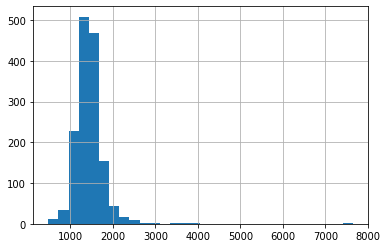

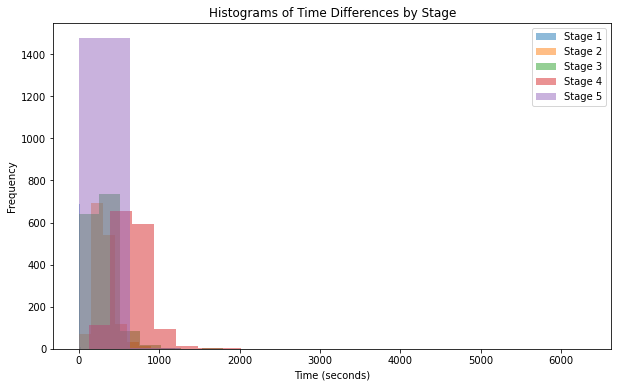

In [199]:
mex = pd.DataFrame(order_stages.groupby(['restaurant_id', 'stage_sequence'])['time_diff'].mean()).reset_index()
mex = mex.pivot(index= 'restaurant_id', columns = 'stage_sequence' , values = 'time_diff').reset_index()
cols_to_sum = [1, 2 , 3, 4, 5]
mex['total_time'] = mex[1] + mex[2] + mex[3] + mex[4] + mex[5]
mex['total_time'].hist(bins=30)

# Plot multiple histograms in the same plot
plt.figure(figsize=(10, 6))

for col in cols_to_sum:
    plt.hist(mex[col], alpha=0.5, label=f'Stage {col}')

# plt.hist(mex['total_time'], alpha=0.5, label='Total Time')

plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histograms of Time Differences by Stage')
plt.legend()
plt.show()

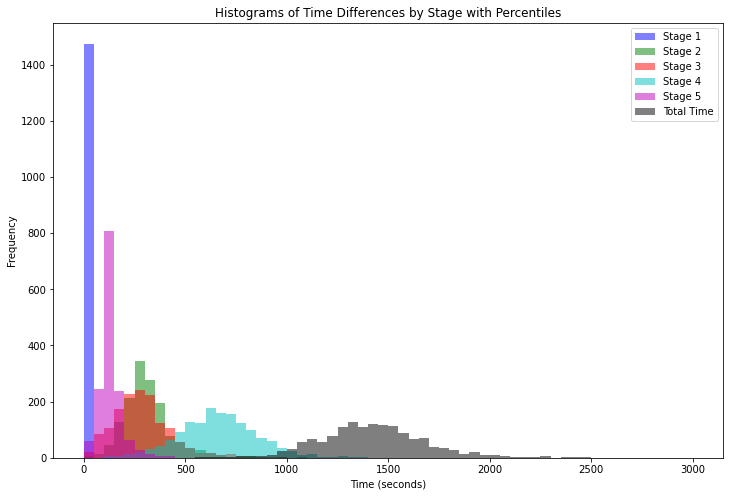

In [203]:

bin_size = 50
cutoff = 3000
bins = np.arange(0, cutoff + bin_size, bin_size)

# Filter data
filtered_mex = mex[mex['total_time'] <= cutoff]

# Plot histograms
plt.figure(figsize=(12, 8))

colors = ['b', 'g', 'r', 'c', 'm', 'y']
for i, col in enumerate(cols_to_sum):
    plt.hist(filtered_mex[col], bins=bins, alpha=0.5, label=f'Stage {col}', color=colors[i])

# Plot total time
plt.hist(filtered_mex['total_time'], bins=bins, alpha=0.5, label='Total Time', color='k')

# Annotations for percentiles
for col in cols_to_sum + ['total_time']:
    p75 = np.percentile(filtered_mex[col], 75)
    p90 = np.percentile(filtered_mex[col], 90)
    p99 = np.percentile(filtered_mex[col], 99)

plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.title('Histograms of Time Differences by Stage with Percentiles')
plt.legend()
plt.show()


In [194]:
# Compute percentiles
percentiles = {}
cols_to_sum = [1, 2, 3, 4, 5]
for col in cols_to_sum + ['total_time']:
    percentiles[col] = {
        'P75': np.percentile(mex[col], 75),
        'P90': np.percentile(mex[col], 90),
        'P99': np.percentile(mex[col], 99)
    }

percentiles_df = pd.DataFrame(percentiles).T
percentiles_df

,P75,P90,P99
1,12.615385,14.000000,20.000000
2,365.842105,467.250000,834.601515
3,362.436364,469.400000,861.400000
4,784.687500,911.000000,1258.400000
5,149.586207,189.809524,373.300000
total_time,1581.705882,1763.250000,2424.800000


In [209]:
orders_stages['distance_courier_to_customer_address'].mean()
orders_stages['courier_id'].nunique()
orders_stages['order_id'].nunique()


64205

### Part 1  Acquisition and Orders (Data Exploration)

In [12]:
# Loading the Data in Pandas
acquisition_data = pd.read_excel('BB Analyst_ Dataset.xlsx', sheet_name='Acquisition data')
orders_data = pd.read_excel('BB Analyst_ Dataset.xlsx', sheet_name='Orders data')
acquisition_data.head()


,Region,Acquisition Channel,Tier Segment,Acquisition month_dt,New Companies
0,Novaria,Organic,T3,2024-02-01,1
1,Seraphica,Outreach,T4,2024-02-01,1
2,Valoria,Marketing,T4,2024-02-01,3
3,Aquilonia,Marketing,T3,2024-02-01,2
4,Novaria,Outreach,T4,2024-02-01,1


In [18]:
print(acquisition_data.isnull().sum())
print(acquisition_data.describe())

Region                  0
Acquisition Channel     0
Tier Segment            0
Acquisition month_dt    0
New Companies           0
dtype: int64
                Acquisition month_dt  New Companies
count                           1155    1155.000000
mean   2023-01-10 00:27:25.714285568       9.648485
min              2022-01-01 00:00:00       1.000000
25%              2022-07-01 00:00:00       2.000000
50%              2023-01-01 00:00:00       5.000000
75%              2023-08-01 00:00:00      12.000000
max              2024-02-01 00:00:00     158.000000
std                              NaN      13.466477


In [19]:
print(orders_data.isnull().sum())
print(orders_data.describe())
orders_data.head()

Region                 0
Acquisition Channel    0
Segment                0
Order month_dt         0
Active Companies       0
Revenue                0
Orders                 0
dtype: int64
                      Order month_dt  Active Companies       Revenue  \
count                           1756       1756.000000   1756.000000   
mean   2023-02-17 17:00:57.403188992         39.584282   6020.625047   
min              2022-01-01 00:00:00          1.000000      1.039108   
25%              2022-08-01 00:00:00          4.000000    761.502375   
50%              2023-03-01 00:00:00         16.000000   2682.457918   
75%              2023-09-01 00:00:00         49.250000   7707.213576   
max              2024-03-01 00:00:00        490.000000  71013.628128   
std                              NaN         62.271515   8245.028443   

             Orders  
count   1756.000000  
mean    1108.743736  
min        1.000000  
25%      105.000000  
50%      391.000000  
75%     1292.250000  
max    11

,Region,Acquisition Channel,Segment,Order month_dt,Active Companies,Revenue,Orders
0,Novaria,Outreach,T3,2024-03-01,1,4.361266,2
1,Lumina,Marketing,T2,2024-03-01,1,3.201000,1
2,Veridia,Outreach,T1,2024-03-01,4,163.221550,22
3,Veridia,Organic,T3,2024-03-01,3,21.973600,3
4,Veridia,Marketing,T3,2024-03-01,7,59.440000,8


In [93]:
def plot_pie_chart(data, feature, val_col = 'New Companies'):
    feature_sum = data.groupby(feature)[val_col].sum()
    colors = sns.color_palette('pastel')[0:len(feature_sum)]
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.1f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct
    plt.figure(figsize=(10, 6))
    plt.pie(feature_sum, labels=feature_sum.index, autopct=make_autopct(feature_sum), 
            startangle=140, colors=colors, shadow=True, explode=[0.05]*len(feature_sum))
    plt.title(f'{val_col} by {feature}', fontsize=16)
    plt.legend(feature_sum.index, title=feature, bbox_to_anchor=(1, 1))
    plt.show()

def plot_pie_chart_ax(ax, data, feature):
    feature_sum = data.groupby(feature)['New Companies'].sum()
    feature_sum = feature_sum.sort_values(ascending=False)
    colors = sns.color_palette('pastel')[0:len(feature_sum)]
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{p:.1f}%  ({v:d})'.format(p=pct, v=val)
        return my_autopct

    ax.pie(feature_sum, labels=feature_sum.index, autopct=make_autopct(feature_sum), 
           startangle=140, colors=colors, shadow=True, explode=[0.05]*len(feature_sum))
    ax.set_title(f'Number of New Companies by {feature}', fontsize=16)
    ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.


Index(['Region', 'Acquisition Channel', 'Segment', 'Order month_dt',
       'Active Companies', 'Revenue', 'Orders', 'Year'],
      dtype='object')


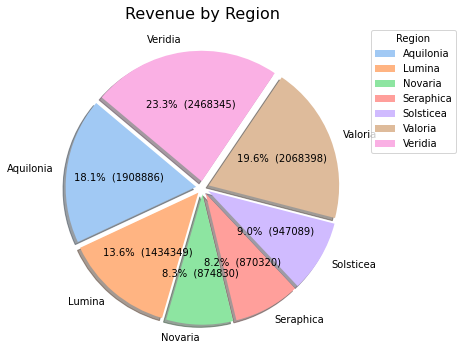

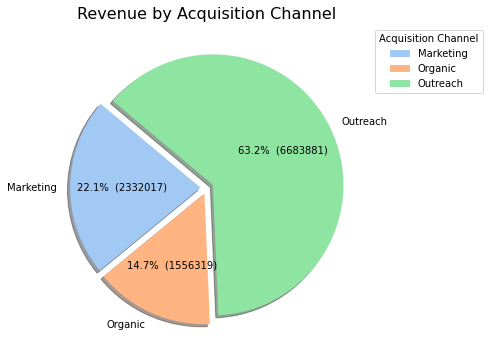

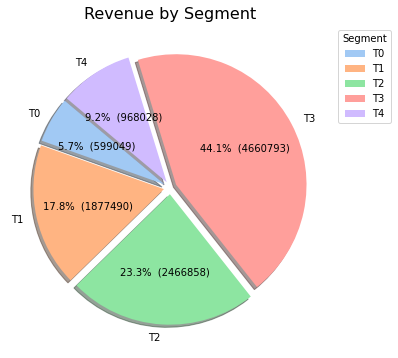

In [94]:
# features = ['Region', 'Acquisition Channel', 'Tier Segment']
# num_features = len(features)
# num_cols = 2
# num_rows = (num_features + 1) // num_cols
# fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows * 7))
# axes = axes.flatten()

# for i, feature in enumerate(features):
#     plot_pie_chart_ax(axes[i], acquisition_data, feature)

# for j in range(i + 1, len(axes)):
#     fig.delaxes(axes[j]) 
# plt.tight_layout()
# plt.show()

# print(acquisition_data.head())
# for feature in ['Region', 'Acquisition Channel', 'Tier Segment']:
#     plot_pie_chart(acquisition_data, feature)

print(orders_data.columns)
for feature in ['Region', 'Acquisition Channel', 'Segment']:
    plot_pie_chart(orders_data, feature, val_col='Revenue')

Index(['Region', 'Acquisition Channel', 'Segment', 'Order month_dt',
       'Active Companies', 'Revenue', 'Orders'],
      dtype='object')


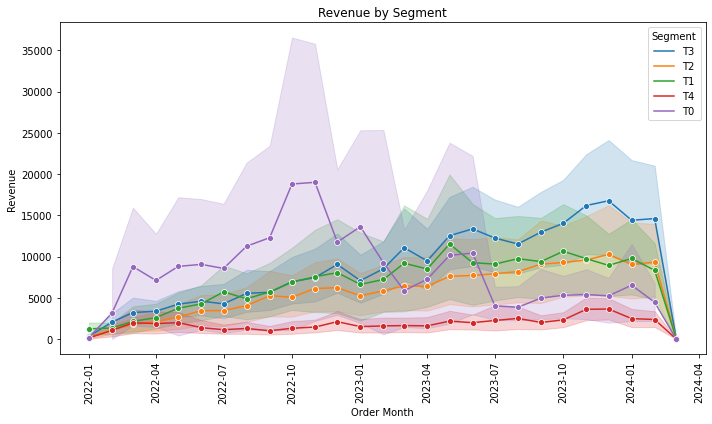

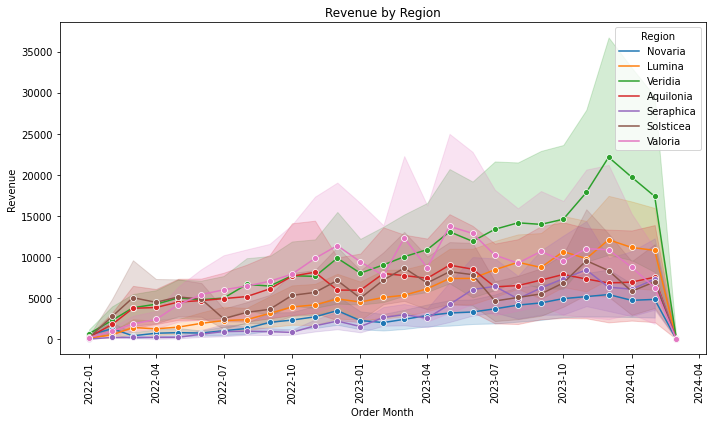

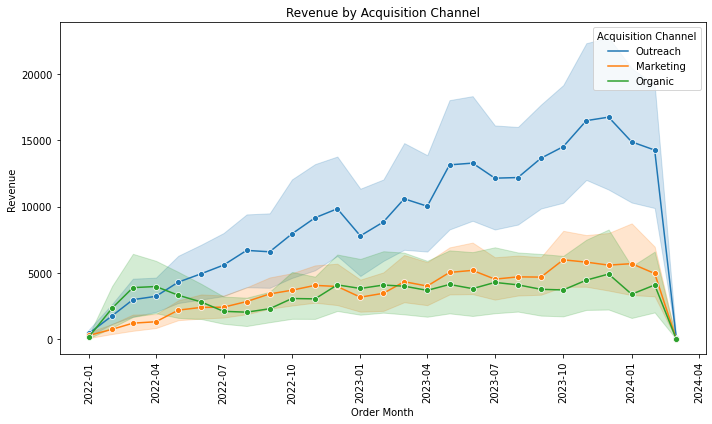

In [62]:
# Revenue 
print(orders_data.columns)
features = ['Segment', 'Region', 'Acquisition Channel']

# Loop through features and create a plot for each
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=orders_data, x='Order month_dt', y='Revenue', hue=feature, marker='o')
    plt.title(f'Revenue by {feature}')
    plt.xlabel('Order Month')
    plt.ylabel('Revenue')
    # Rotate x-axis labels
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [64]:
# To do
# Merge datasets for combined analysis
# Project 2024 data as it is less as we have data only up till March
# Quarter on Quarter 
# Did we Acquire more of T1 or T2 in 2023 or 2024





In [63]:
orders_data.to_clipboard()

In [69]:
acquisition_data.to_clipboard()